In [29]:
#SOURCE: https://github.com/JosephLahiru/coppeliasim-python/tree/main/Part%2003/model_creation

import numpy as np

data=np.load('ModelData/data.npy')
target=np.load('ModelData/target.npy')
data.shape[1:]

(128, 64, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


early_stop = EarlyStopping(
    monitor='val_loss',       # You can also monitor 'val_accuracy'
    patience=15,              # Stop after 20 epochs with no improvement
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.4,               # Reduce learning rate by half
    patience=15,               # Wait 15 epochs before reducing
    min_lr=1e-6,              # Don't go below this learning rate
    verbose=1
)

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), padding='same', input_shape=data.shape[1:]))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Block 3 (optional)
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Global Pooling
model.add(GlobalAveragePooling2D())

# Dense layers
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(target.shape[1], activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 64, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 64, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 128, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 64, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,555 (92.01 KB)

 Trainable params: 23,363 (91.26 KB)

 Non-trainable params: 192 (768.00 B)

In [31]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [32]:
# Convert one-hot encoded labels to class indices
y_integers = np.argmax(train_target, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers
)

# Convert to dictionary format
class_weights_dict = dict(enumerate(class_weights))

print("Train target shape:", train_target.shape)
print("Validation target shape:", test_target.shape)

history = model.fit(
    train_data,
    train_target,
    validation_data=(test_data, test_target),
    epochs=90,
    callbacks=[early_stop,reduce_lr],
    class_weight = class_weights_dict
)

Train target shape: (875, 3)
Validation target shape: (98, 3)
Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.3851 - loss: 1.1751 - val_accuracy: 0.3367 - val_loss: 1.1541 - learning_rate: 0.0010
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4149 - loss: 1.1079 - val_accuracy: 0.3367 - val_loss: 1.1552 - learning_rate: 0.0010
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4823 - loss: 1.0672 - val_accuracy: 0.2959 - val_loss: 1.1765 - learning_rate: 0.0010
Epoch 4/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5257 - loss: 1.0502 - val_accuracy: 0.2347 - val_loss: 1.2152 - learning_rate: 0.0010
Epoch 5/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5749 - loss: 1.0072 - val_accuracy: 0.2245 - val_loss: 1.2698 - learning_rate: 0.0010
Epoch 6/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.6229 - loss: 0.9463 - val_accuracy: 0.3367 - val_loss: 1.3299 - learning_rate: 0.0010
Epoch 7/90
28/28 ━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.34      1.00      0.50        33
           2       0.00      0.00      0.00        22

    accuracy                           0.34        98
   macro avg       0.11      0.33      0.17        98
weighted avg       0.11      0.34      0.17        98

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/andrew/Documents/University Work/EG505P/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

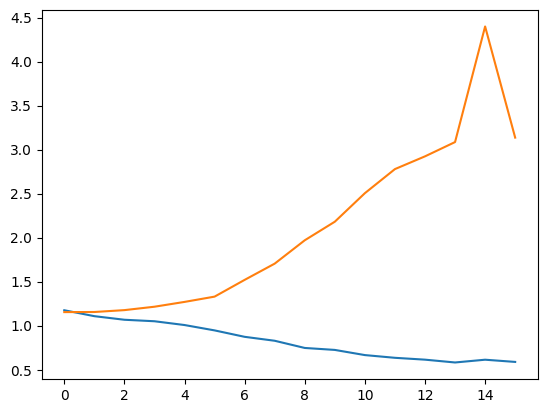

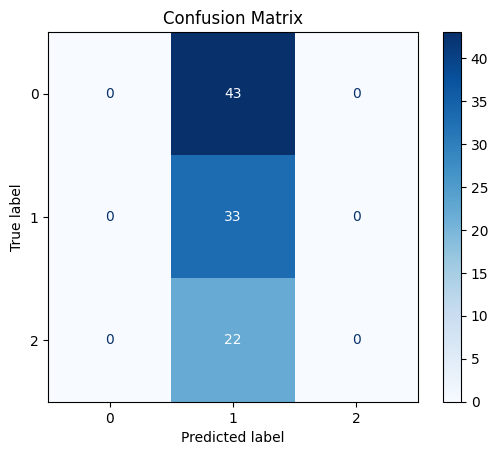

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Plot performance
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Plot per-class accuracy
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
print(classification_report(y_true, y_pred_classes))

#Make confusion matrix
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



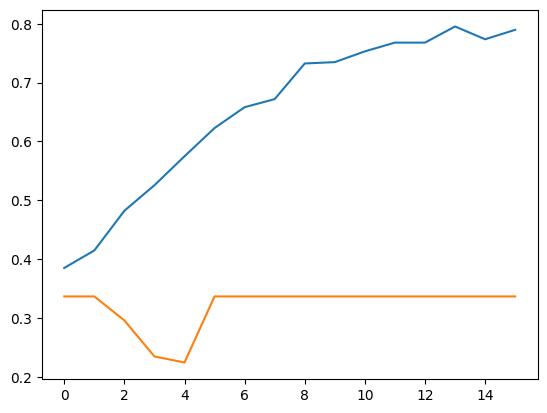

In [34]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:


accc = model.evaluate(test_data,test_target)
print(accc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3367 - loss: 1.1541
[1.1540858745574951, 0.33673468232154846]


In [36]:
modelName = "Models/Model" + str(round(accc[1],4)) + ".h5"
model.save(modelName)